# Taxas de juros de curto-prazo
(EN: **interest rates**)

Se eu te empresto R\\$ 100, a serem devolvidos daqui a 1 mês, eu espero que você me pague mais que R\\$ 100 de volta. Isso faz sentido porque te emprestar um dinheiro tem um *custo de oportunidade*: em vez de deixar esse dinheiro com você, eu poderia usá-lo em outro investimento; para juntar numa caixinha para comprar um computador novo; etc.

Se eu te peço, por exemplo, R\\$ 110 em troca, então a taxa de juros é de 

$$\frac{\mathrm{R\$\,} 110 -\mathrm{R\$\,} 100}{\mathrm{R\$\,}100 \times 1 \mbox{ mês}} = 0.10 \mbox{/mês} =  10\% \mbox {/ mês}$$

> **Unidades**: é importante notar que a unidade básica da taxa de juros é $\mathrm{tempo}^{-1}$. Isso é importante porque raramente ela aparecerá sozinha, mas em geral multiplicando (ou sendo integrada contra) algum intervalo de tempo. 

A equação básica é: se $M_0$ (unidade: dinheiros) é um empréstimo feito em $t=t_0$ a ser pago em $t=t$ por um valor $M_t$ (unidade: dinheiros) então a taxa de juros $r(t_0, t)$ (unidade: 1/tempo)
é tal que

$$\boxed{M_t = M_0 (1 + r(t_0, t) \Delta t)}$$

> Na escola, às vezes vemos a taxa de juros como um número puro (ex: no exemplo acima diríamos apenas que ela é 10\%). Porém, essa visão não é benéfica: toda taxa de juros é atrelada à duração de algum empréstimo. Por isso, acima, colocamos explicitamente a dependência de $r$ nas variáveis $t_0, t$. Quando não for necessário, ou os tempos envolvidos estiverem implícitos, removeremos essa dependência para simplificar a notação.

**Todo empréstimo terá juros**; como veremos abaixo, empréstimos são a base de todos os produtos de renda fixa, logo, entender bem o conceito de juros é fundamental.

## A Selic

No Brasil, muitas vezes falamos "a taxa de juros subiu". Qual taxa? A convenção subentendida aqui é que nos referimos à [**Selic**](https://www.bcb.gov.br/controleinflacao/taxaselic), que é definida a cada 45 dias via uma reunião do Comitê de Política Monetária (Copom) do Bacen.

**A Selic é a taxa de juros que o Governo brasileiro paga por empréstimos.** Como veremos mais para frente, essa taxa vai se propagando para todas as outras atreladas a diferentes empréstimos (por exemplo, entre bancos, ou entre um banco e uma pessoa física, e por ai vai).

> Gráfico da Selic vs. eventos históricos: https://clubedospoupadores.com/selic/meta 

### A taxa livre de risco e as "Selic"s por aí
(EN: **risk-free rate**)

Em finanças teóricas, a taxa livre de risco é uma taxa de juros mínima que não tem implica risco nenhum à parte que empresta o dinheiro. Ou seja: se eu empresto 100 reais para alguém com um juro total de 5% sobre algum período, então eu receberei 105 reais de volta ao final com 100% de certeza - não há risco de calote, de a outra parte desaparecer, etc.


No mundo real tudo tem riscos, mas é comum assumir que **empréstimos ao governo são livres de risco**. Assim, quando em artigos ou discussões aparecer a expressão de taxa livre de risco, instintivamente podem assumir que estamos falando da Selic.

Nos EUA, o equivalente do Copom é o Federal Open Market Committee (FOMC), também se encontrando um número fixo de vezes ao ano. O equivalende da Selic seria o Federal Funds Rate, que é definido num range.

### Selic Meta vs. Over

A Selic definida pelo Copom é a chamada taxa **Selic Meta**, literalmente porque ela coloca uma meta no valor das taxa de juros.

Na vida real, as taxas aplicadas entre instituições pode ter desvios em relação à Selic Meta.

Todos os dias, instituições financeiras precisam fechar seu caixa, visando cumprir obrigações de capital e liquidez. Assim, haverá operações de empréstimos com horizonte diário que levam em consideração a Selic Meta.

A média das taxas de juros dessas transações diárias é chamada de taxa **Selic Over.** ("Over" vindo de "overnight", dado que são transações voltadas a balanceamento de caixa no fim do dia). Historicamente, é comum observar 

Historicamente, no Brasil, a taxa Meta e a Over se diferem na ordem de 1 ponto percentual:

$$r_\mathrm{over} \approx r_\mathrm{meta} - \mbox{0.1 %};$$

por exemplo, se a meta estiver em 6.3%, a over deve estar próxima de 6.2%.

> Em suma: a Selic Meta é o valor teórico estipulado pelo Copom. A Selic Over é o valor observado das taxas realizadas, naturalmente direcionado mas não idêntico à Selic Meta.

> Comparação das duas Selics: https://www.bcb.gov.br/controleinflacao/historicotaxasjuros

### Selic vs. DI vs. CDI

A Selic define uma taxa de juros para empréstimos ao governo.

Por outro lado, a **taxa DI** (de "Depósitos Interbancários") é a taxa de juros que bancos aplicam entre si para empréstimos. O instrumento para fazer esse empréstimo é o Certificado de Depósito Interbancário, o **CDI**.

> O DI é uma taxa, enquanto o CDI é um instrumento financeiro. Porém, os termos são muitas vezes usados de forma intercambiável.

**O DI é extremamente próximo da Selic (Over).** Para efeitos práticos, consideraremos a Selic em todas as contas.

## Baixando a Selic via API do Bacen
[Referência](https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic/resource/b73edc07-bbac-430c-a2cb-b1639e605fa8)

Informações importantes:

* O dado do Bacen vem em unidade $\%/\mbox{dia}$, e não $1/\mbox{dia}$. Ou seja, para usá-lo, precisaremos dividi-lo por 100 para trazê-lo à escala absoluta.

* A Selic obtida via está API é a Selic Over.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
from datetime import datetime

pd.options.mode.chained_assignment = None 

Usaremos uma classe abstrata para servir de blueprint para baixarmos dados de diversos indicadores:

In [5]:
from dataloader import DataLoader

In [8]:
class SelicLoader(DataLoader):
        
    def load_data_from_range(self, t0=None, tf=None):
        """Loads Selic data from Bacen API. 
        
        Baixa dados da taxa de juros que representa a taxa média ajustada
        das operações compromissadas com prazo de um dia útil lastreadas com 
        títulos públicos federais custodiados no  Sistema Especial de Liquidação
        e de Custódia (Selic).
        
        Dados são reportados em % ao dia. Ex: a value of 0.032927 for 2010-01-04
        means that overnight operations had interest of 0.032927% on this day.

        t0: initial time. A datetime.datetime object (default=None);
            if let None, will download a 12-month interval prior to tf
        tf: final time. A datetime.datetime object (default=None);
            if let None, will be set to the current day         
        
        ----
        Examples:

        from datetime import datetime
        SelicLoader().load_data_from_range(t0=datetime(2010,12,1))
        
        SelicLoader().load_data_from_range(t0=pd.to_datetime('2010-12-01'))
        """

        if tf is None:
            tf = pd.to_datetime('today')
        
        if t0 is None:
            t0 = tf - pd.DateOffset(years=1)
        
        self.t0 = t0
        self.tf = tf
        
        self._download_series(t0, tf)
        self._json_to_dataframe()
        
        return self
    
    def _download_series(self, t0: datetime, tf: datetime):

        url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json' + \
          f'&dataInicial={self._two_digits(t0.day)}/{self._two_digits(t0.month)}/{t0.year}' + \
          f'&dataFinal={self._two_digits(tf.day)}/{self._two_digits(tf.month)}/{tf.year}'

        req = requests.get(url)
        req.raise_for_status()
        
        self.json = req.json()
        return
    
    def _json_to_dataframe(self):
        """
        Metadata: https://www3.bcb.gov.br/sgspub/consultarmetadados/consultarMetadadosSeries.do?
        method=consultarMetadadosSeriesInternet&hdOidSerieSelecionada=11"""
        
        df = pd.DataFrame(self.json)
        df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
        df['valor'] = df['valor'].astype(float).round(6) # dados com 6 casas
        df = df.set_index('data')
        self.df = df
        return

In [9]:
%%time
data = SelicLoader().load_data_from_range(t0=datetime(2010, 1,1))

CPU times: user 39.9 ms, sys: 15.2 ms, total: 55.1 ms
Wall time: 4.45 s


In [10]:
selic = data.get_pandas()

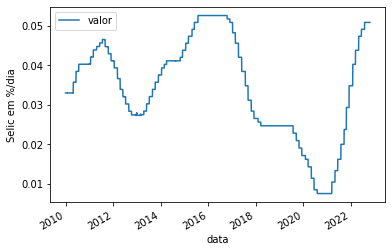

In [11]:
selic.plot()
plt.ylabel("Selic em %/dia")
plt.show()

Note como a série da Selic é essencialmente uma função escada. Isso é esperado, pois ela é ajustada a cada 45 dias.

Se olharmos as primeiras 10 entradas:

In [7]:
selic.head(10)

,valor
data,
2009-12-31,0.032927
2010-01-04,0.032927
2010-01-05,0.032927
2010-01-06,0.032927
2010-01-07,0.032927
2010-01-08,0.032927
2010-01-11,0.032927
2010-01-12,0.032927
2010-01-13,0.032927


veremos que a Selic (assim como diversos outros itens no mercado) não considera fins de semana (dias 9 e 10/jan) e feriados públicos.

In [8]:
selic['equals'] = (selic['valor'] == selic['valor'].shift(1))
selic = selic.iloc[1:]
dates = selic[~selic['equals']].index.to_series().reset_index(drop=True)
difs = (dates - dates.shift(1)).dt.days

In [9]:
pd.DataFrame(difs.value_counts()).reset_index().rename({'index': 'Dias entre variações da Selic',
                                                        'data': 'Frequência observada'}, axis=1).head()

,Dias entre variações da Selic,Frequência observada
0,42.0,19
1,1.0,18
2,49.0,14
3,3.0,9
4,2.0,7


Note que, apesar de na maior parte das vezes as variações observadas serem na ordem de 45 dias, valores baixos aparecem também. Isso se dá pelo fato de estarmos observando a Selic Over, que é uma média de valores realizados de taxas de juros, e apesar de próximo da Selic Meta, não são sempre iguais e podem ter um delay entre si.

### O que os valores da Selic em cada dia da tabela querem dizer?

Suponha que no primeiro dia útil de 2010 nós emprestamos 1000 reais ao Governo (como veremos mais para frente, isso se faz via títulos públicos). Ele nos paga de volta no dia seguinte, com uma taxa de juros de

In [10]:
print(f"{selic.loc['2010-01-04'].iloc[0]}% ao dia")

0.032927% ao dia


Ou seja, ele nos devolverá, arredondando, $1000 (1 +  3.2927 \times 10^{-4}) \approx 1000.33$ reais. Se pegarmos esse dinheiro e o emprestarmos de novo ao governo, imediatamente, no dia seguinte ele nos devolverá com um juro de

In [11]:
print(f"{selic.loc['2010-01-05'].iloc[0]}% ao dia,")

0.032927% ao dia,


ou seja, nosso novo montante será de $1000.33 (1 +   3.2927 \times 10^{-4}) \approx 1000.66$.

### Se repetirmos esse procedimento todos os dias, qual será o juros efetivo acumulado ao longo do ano de 2010?

**Resposta errada**: basta somar os valores da Selic de todos os dias de 2010. Isso dará:

In [12]:
selic = selic.assign(year=selic.index.to_series().dt.year)

In [13]:
naive_agg_selic = selic.\
    groupby('year').\
    sum().\
    loc[2010].\
    iloc[0]/100    ## cuidado com a divisao por 100 aqui!

print(f'Juros acumulados 2010 (forma ingenua) = {round(100*naive_agg_selic, 2)}% ao ano')

Juros acumulados 2010 (forma ingenua) = 9.33% ao ano


**Resposta correta**:

Se $r_i$ é a taxa de juros diária aplicada a uma série de $N$ empréstimos iniciado em $M_0$, então o montante final será

$$M_f = M_0 (1+r_1 \Delta t)(1+r_2 \Delta t) \cdots (1+r_N \Delta t) \equiv \prod_{i=1}^N (1+r_i \Delta t),$$

em que $\Delta t = \mbox{1 dia}$.

Definindo a taxa equivalente via

$$M_f = M_0 (1 + r_\mathrm{year} \Delta t_\mathrm{year}),$$

obtemos

$$M_0 (1 + r_\mathrm{year} \Delta t_\mathrm{year}) = M_0 \prod_{i=1}^N (1+r_i \Delta t)$$

$$\Rightarrow \boxed{1 + r_\mathrm{year}\Delta t_\mathrm{year} = \prod_{i=1}^N (1+r_i \Delta t).}$$

Essa expressão é exata, e podemos calculá-la com os dados que temos:

In [14]:
# precisamos converter as porcentagens em floats
# de novo, veja a divisao por 100 aqui
correct_agg_selic = (selic.assign(plus_one=selic.valor/100+1).\
    groupby('year').\
    prod()-1)['plus_one'].\
    loc[2010]

print(f"Juros acumulados 2010 (forma correta) = {round(100*correct_agg_selic,2)}% ao ano")

Juros acumulados 2010 (forma correta) = 9.78% ao ano


Note que esse valor é maior que o obtido de forma ingênua. Ele está [de acordo com o registrado pelo Bacen](https://www.bcb.gov.br/pec/boletim/banual2010/rel2010cap3p.pdf).

#### Usando séries de Taylor

Assumindo que todos os termos no produtório são positivos (o que é uma hipótese razoável), podemos tomar o logaritmo. Obtemos

$$\log( 1 + r_\mathrm{year}\Delta t_\mathrm{year}) = \sum_{i=1}^N \log(1+r_i \Delta t)$$

Aqui começam as aproximações. *Assumindo* que $r_i \Delta t$ é pequeno (o que é verdade: esses produtos eram da ordem de $10^{-4}$ para o ano de 2010), podemos expandir o lado direito via Taylor:

$$\log(1+x) = x - \frac{x^2}{2} + O(x^3)$$

obtendo

$$\log( 1 + r_\mathrm{year}\Delta t_\mathrm{year}) \approx \sum_{i=1}^N r_i \Delta t$$

ou, isolando a taxa de juros final,

$$r_\mathrm{year}\Delta t_\mathrm{year} \approx \exp \left[\sum_{i=1}^N r_i \Delta t \right] - 1.$$

In [15]:
approximate_agg_selic = np.exp(naive_agg_selic)-1
print(f"Juros acumulados 2010 (aproximadamente) {round(100*approximate_agg_selic,2)}% ao ano")

Juros acumulados 2010 (aproximadamente) 9.78% ao ano


Note que a aproximação foi excelente: conseguimos usá-la para converter a estimativa ingênua ($\sum_i r_i \Delta t$) na correta!

> Note que, formalmente, podemos e iremos considerar taxas de juros contíntuas: $r = r(t)$. Nesse caso, a expressão acima se torna exata:


$$r_\mathrm{year}\Delta t_\mathrm{year} = \exp \left[\int_{t_0}^t r(t') dt' \right] - 1$$

In [14]:
# salvando para uso futuro
selic.to_parquet('../_data/selic.pqt')